In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
r = 8
lora_alpha = [4,16,32]
lora_dropout = 0.0
lr = 1.0e-4
g = 2
wd = 0.01

for a in lora_alpha:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {a}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=a,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['a'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, lr: 0.0001. Focal loss gamma: 2. Weight decay 0.01. Lora rank: 8. Lora alpha: 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3700	Val Loss:	0.7238	Accuracy:	0.2801	F1:	0.2454
2 / 10: Train Loss:	0.3505	Val Loss:	0.6940	Accuracy:	0.4989	F1:	0.4970
3 / 10: Train Loss:	0.3356	Val Loss:	0.6748	Accuracy:	0.5974	F1:	0.5843
4 / 10: Train Loss:	0.3141	Val Loss:	0.6334	Accuracy:	0.6827	F1:	0.6488
5 / 10: Train Loss:	0.2960	Val Loss:	0.5967	Accuracy:	0.7287	F1:	0.6845
6 / 10: Train Loss:	0.2913	Val Loss:	0.5920	Accuracy:	0.7265	F1:	0.6837
7 / 10: Train Loss:	0.2739	Val Loss:	0.5677	Accuracy:	0.7396	F1:	0.6943
8 / 10: Train Loss:	0.2659	Val Loss:	0.5573	Accuracy:	0.7440	F1:	0.6994
9 / 10: Train Loss:	0.2535	Val Loss:	0.5450	Accuracy:	0.7484	F1:	0.7079
10 / 10: Train Loss:	0.2402	Val Loss:	0.5374	Accuracy:	0.7571	F1:	0.7192
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.52      0.75      0.62       119
      struct       0.90      0.76      0.82       338

    accuracy                           0.76       457
   macro avg      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3670	Val Loss:	0.7194	Accuracy:	0.2932	F1:	0.2620
2 / 10: Train Loss:	0.3395	Val Loss:	0.6808	Accuracy:	0.5602	F1:	0.5530
3 / 10: Train Loss:	0.3147	Val Loss:	0.6235	Accuracy:	0.7046	F1:	0.6710
4 / 10: Train Loss:	0.2857	Val Loss:	0.5814	Accuracy:	0.7199	F1:	0.6755
5 / 10: Train Loss:	0.2660	Val Loss:	0.5543	Accuracy:	0.7462	F1:	0.7037
6 / 10: Train Loss:	0.2537	Val Loss:	0.5494	Accuracy:	0.7396	F1:	0.7053
7 / 10: Train Loss:	0.2324	Val Loss:	0.5321	Accuracy:	0.7484	F1:	0.7161
8 / 10: Train Loss:	0.2127	Val Loss:	0.5038	Accuracy:	0.7943	F1:	0.7580
9 / 10: Train Loss:	0.1919	Val Loss:	0.4761	Accuracy:	0.7921	F1:	0.7540
10 / 10: Train Loss:	0.1700	Val Loss:	0.4630	Accuracy:	0.8118	F1:	0.7720
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.61      0.76      0.68       119
      struct       0.91      0.83      0.87       338

    accuracy                           0.81       457
   macro avg      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3644	Val Loss:	0.7143	Accuracy:	0.3107	F1:	0.2866
2 / 10: Train Loss:	0.3317	Val Loss:	0.6532	Accuracy:	0.6630	F1:	0.6367
3 / 10: Train Loss:	0.2971	Val Loss:	0.6030	Accuracy:	0.7046	F1:	0.6740
4 / 10: Train Loss:	0.2684	Val Loss:	0.5661	Accuracy:	0.7177	F1:	0.6836
5 / 10: Train Loss:	0.2445	Val Loss:	0.5503	Accuracy:	0.7396	F1:	0.7100
6 / 10: Train Loss:	0.2226	Val Loss:	0.5123	Accuracy:	0.7812	F1:	0.7456
7 / 10: Train Loss:	0.1992	Val Loss:	0.4992	Accuracy:	0.7724	F1:	0.7383
8 / 10: Train Loss:	0.1753	Val Loss:	0.4648	Accuracy:	0.7987	F1:	0.7582
9 / 10: Train Loss:	0.1511	Val Loss:	0.4255	Accuracy:	0.8118	F1:	0.7678
10 / 10: Train Loss:	0.1318	Val Loss:	0.4208	Accuracy:	0.8162	F1:	0.7721
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.63      0.72      0.67       119
      struct       0.90      0.85      0.87       338

    accuracy                           0.82       457
   macro avg      

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = {'acc': [0.7265625, 0.765625, 0.7890625, 0.7890625], 'f1': [0.6860106532099804, 0.7325719061215962, 0.745414364640884, 0.7412980013474062], 'a': [4, 8, 16, 32]}

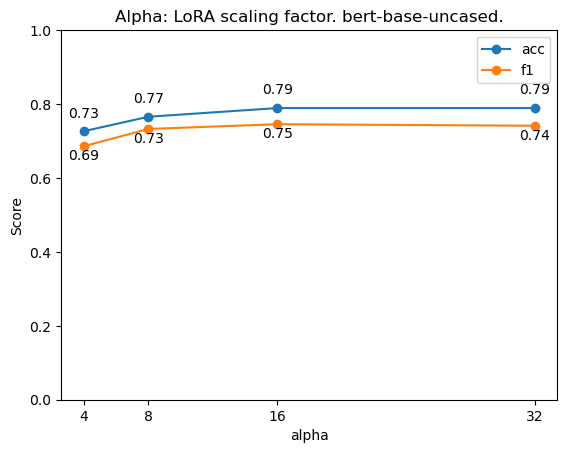

In [10]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')